# **Pivot Table**

In [19]:
# !pip install seaborn -q

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = sns.load_dataset('tips')

In [23]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [24]:
# Based on Gender what is the avg total bil
df.groupby('sex')['total_bill'].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [25]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [26]:
# Based on Gender and smoker what is the avg total bil
df.groupby(['sex', 'smoker'])['total_bill'].mean().unstack()

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


The pivot table function takes in a data frame and the parameters detailing the shape you want the data to take. Then it outputs summarized data in the form of a pivot table.

In [27]:
## Now use pivot table
pd.pivot_table(data=df, columns=['sex', 'smoker'], values='total_bill')

sex            Male                Female           
smoker          Yes         No        Yes         No
total_bill  22.2845  19.791237  17.977879  18.105185

In [28]:
# aggfunc
pd.pivot_table(data=df, columns=['sex', 'smoker'], values='total_bill', aggfunc='sum')

sex            Male           Female        
smoker          Yes       No     Yes      No
total_bill  1337.07  1919.75  593.27  977.68

In [29]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [30]:
# all cols together
df.pivot_table(index='sex', columns=['smoker'], values=['size'])

size          
smoker       Yes        No
sex                       
Male    2.500000  2.711340
Female  2.242424  2.592593

In [31]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [32]:
df['day'].nunique()

4

In [33]:
# multidimensional
df.pivot_table(index=['sex','smoker'], columns=['day','time'], aggfunc={'size':'mean','tip':'max','total_bill':'sum'})

size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71   0.00  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73   0.00   0.00   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53   0.00  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

In [34]:
# margins

df.pivot_table(index=['sex','smoker'], columns=['day','time'], aggfunc={'size':'var', 'tip':'max','total_bill':'sum'}, margins=True)

size                                                    \
day                Thur       Fri                 Sat       Sun       All   
time              Lunch     Lunch    Dinner    Dinner    Dinner             
sex    smoker                                                               
Male   Yes     0.455556  0.333333  0.800000  0.857550  0.971429  0.796610   
       No      1.315789       NaN  0.000000  0.619960  1.105205  0.978308   
Female Yes     0.619048  0.000000  0.000000  0.457143  0.333333  0.376894   
       No      1.565217       NaN       NaN  0.564103  0.994505  1.151642   
All            1.152459  0.333333  0.333333  0.671211  1.014737  0.904591   

                tip                      ...       total_bill                \
day            Thur          Fri         ...   All       Thur           Fri   
time          Lunch Dinner Lunch Dinner  ...            Lunch Dinner  Lunch   
sex    smoker                            ...                                  
Male   Yes     5.00    NaN  2.20   4.73  ...  10.0     191.71   0.00  34.16   
       No      6.70    NaN   NaN   3.50  ...   9.0     369.73   0.00   0.00   
Female Yes     5.00    NaN  3.48   4.30  ...   6.5     134.53   0.00  39.78   
       No      5.17    3.0  3.00   3.25  ...   5.2     381.58  18.78  15.98   
All            6.70    3.0  3.48   4.73  ...  10.0    1077.55  18.78  89.92   

                                                              
day                     Sat            Sun               All  
time           Dinner Lunch   Dinner Lunch   Dinner           
sex    smoker                                                 
Male   Yes     129.46   0.0   589.62   0.0   392.12  1337.07  
       No       34.95   0.0   637.73   0.0   877.34  1919.75  
Female Yes      48.80   0.0   304.00   0.0    66.16   593.27  
       No       22.75   0.0   247.05   0.0   291.54   977.68  
All            235.96   NaN  1778.40   NaN  1627.16  4827.77  

[5 rows x 22 columns]

In [35]:
# plotting graphs
df = pd.read_csv('expense_data.csv')

In [36]:
df

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0


In [37]:
df.isnull().sum()

Date                0
Account             0
Category            0
Subcategory       277
Note                4
INR                 0
Income/Expense      0
Note.1            277
Amount              0
Currency            0
Account.1           0
dtype: int64

In [38]:
df.drop(columns=['Subcategory', 'Note.1'], axis=1, inplace=True)

In [39]:
df.isnull().sum()

Date              0
Account           0
Category          0
Note              4
INR               0
Income/Expense    0
Amount            0
Currency          0
Account.1         0
dtype: int64

In [40]:
df

,Date,Account,Category,Note,INR,Income/Expense,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,Brownie,50.0,Expense,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,To lended people,300.0,Expense,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,Dinner,78.0,Expense,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,Metro,30.0,Expense,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,Snacks,67.0,Expense,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,Dinner,90.0,Expense,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,Lunch with company,97.0,Expense,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,Rapido,130.0,Expense,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,Lunch,875.0,Expense,875.0,INR,875.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Note            273 non-null    object 
 4   INR             277 non-null    float64
 5   Income/Expense  277 non-null    object 
 6   Amount          277 non-null    float64
 7   Currency        277 non-null    object 
 8   Account.1       277 non-null    float64
dtypes: float64(3), object(6)
memory usage: 19.6+ KB


In [42]:
df['Date'] = pd.to_datetime(df['Date'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Note            273 non-null    object        
 4   INR             277 non-null    float64       
 5   Income/Expense  277 non-null    object        
 6   Amount          277 non-null    float64       
 7   Currency        277 non-null    object        
 8   Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 19.6+ KB


In [44]:
df['Month'] = df['Date'].dt.month_name()

In [45]:
df.sample(19)

,Date,Account,Category,Note,INR,Income/Expense,Amount,Currency,Account.1,Month
163,2021-12-28 13:42:00,CUB - online payment,Food,Coffee and thattai,14.0,Expense,14.0,INR,14.0,December
139,2022-01-04 13:53:00,CUB - online payment,Food,Lunch with company,106.0,Expense,106.0,INR,106.0,January
47,2022-02-10 20:15:00,CUB - online payment,Food,Kfc dinner,641.0,Expense,641.0,INR,641.0,February
224,2021-12-06 14:08:00,CUB - online payment,Food,Lunch with stu,150.0,Expense,150.0,INR,150.0,December
6,2022-03-01 18:21:00,CUB - online payment,Other,From dad,500.0,Income,500.0,INR,500.0,March
125,2022-01-06 20:58:00,CUB - online payment,Food,Ketch up,20.0,Expense,20.0,INR,20.0,January
16,2022-02-25 12:08:00,CUB - online payment,Food,NaN,33.0,Expense,33.0,INR,33.0,February
220,2021-12-07 07:59:00,CUB - online payment,Food,Horlicks,15.0,Expense,15.0,INR,15.0,December
205,2021-12-14 15:18:00,CUB - online payment,Food,Snacks,74.0,Expense,74.0,INR,74.0,December
147,2022-01-03 14:30:00,CUB - online payment,Other,From abi,300.0,Income,300.0,INR,300.0,January


<Axes: xlabel='Month'>

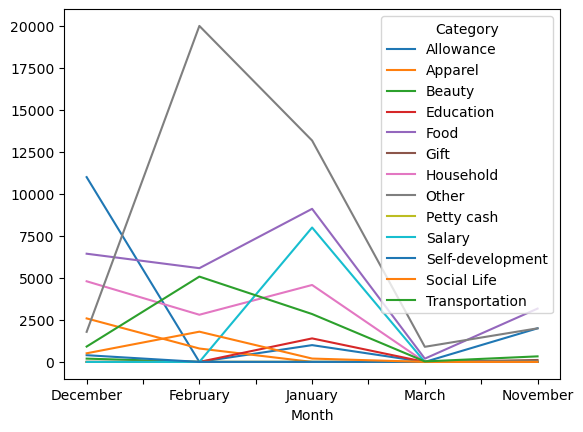

In [46]:
df.pivot_table(index='Month',columns='Category',values='INR',aggfunc='sum', fill_value=0).plot()

<Axes: xlabel='Month'>

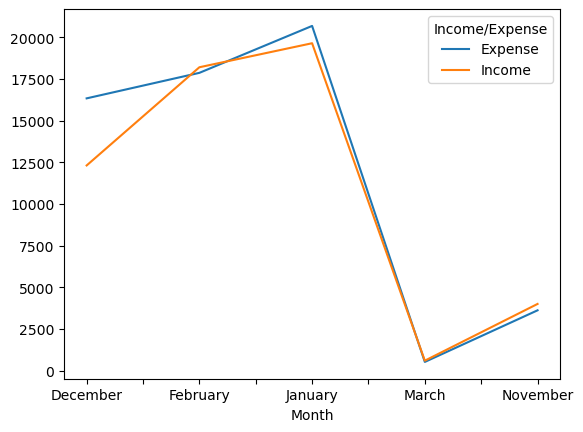

In [47]:
df.pivot_table(index='Month',columns='Income/Expense',values='INR',aggfunc='sum',fill_value=0).plot()